<a id='top'></a>

# CSCI3022 S21
# Homework 7: Regression Practice
***

**Name**: ________________________________________________________________________

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 22**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Data Set 1](#p1) | [Data Set 2](#p2) | [Data Set 3](#p3) |  [Data Set 4](#p4) |
---

In [1]:
#old salwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant


C:\Users\zacha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## [All problems: 11 points/ea]
**Shortcuts:**  [1](#p1) | [2](#p2) | [3](#p3) | [4](#p4) |


Run the cell below to load in the data set known as "Anscombe's Quartet."  It contains 4 data sets, each with its own set of $x$ and $y$ values.


Each data set has exactly 11 observations.  For each data set, you will perform the same steps of visualizing and fitting a linear model.

In [2]:
df = sns.load_dataset("anscombe")

print(df.head())
df['dataset'].unique()

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


array(['I', 'II', 'III', 'IV'], dtype=object)

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [25 points] Data Set 1

For the data set marked with "I" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

In [3]:
df1=df.loc[df['dataset']=='I']
Y, X = dmatrices('y ~ x', data=df1)
lm1=sm.OLS(Y,X).fit()
lm1.summary()

C:\Users\zacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 02 May 2021   Prob (F-statistic):            0.00217
Time:                        18:41:29   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

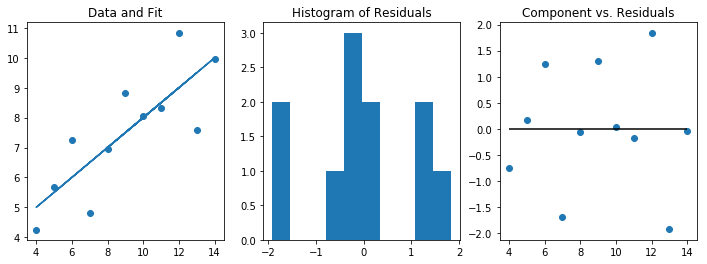

In [4]:
#all plots:
fig, ax= plt.subplots(figsize=(12,4), ncols=3)
ax[0].scatter(df1['x'], df1['y'])
ax[0].plot( df1['x'], lm1.fittedvalues)
ax[0].set_title('Data and Fit')
ax[1].hist(lm1.resid)
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(df1['x'], lm1.resid)
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min(df1['x']), xmax=np.max(df1['x']))


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

Overall, this model looks good!  There are some "big miss" of outliers, but that's probably not enough for us to fully discord normality.  The residuals are probably close enough to normal, and there's no obvious structure.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

What can we do here?  Not much!  It doesn't look like we should square x, so it's probably best to just let it be.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

  All of these data sets have very small sample sizes, so we should be hesitant to conclude too much in general: as is this looks pretty reasonable, and an $R^2$ of 96% isn't too bad!

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Data Set 2

For the data set marked with "II" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

In [5]:
df2=df.loc[df['dataset']=='II']
Y, X = dmatrices('y ~ x', data=df2)
lm2=sm.OLS(Y,X).fit()
lm2.summary()

C:\Users\zacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 02 May 2021   Prob (F-statistic):            0.00218
Time:                        18:41:30   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x              0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

C:\Users\zacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 02 May 2021   Prob (F-statistic):            0.00218
Time:                        18:41:30   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.0

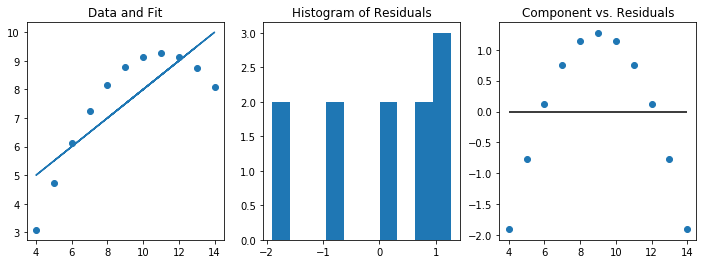

In [6]:
Y, X = dmatrices('y ~ x', data=df2)
lm2=sm.OLS(Y,X).fit()
print(lm2.summary())
#all plots:
fig, ax= plt.subplots(figsize=(12,4), ncols=3)
ax[0].scatter(df2['x'], df2['y'])
ax[0].plot( df2['x'], lm2.fittedvalues)

ax[0].set_title('Data and Fit')
ax[1].hist(lm2.resid)
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(df2['x'], lm2.resid)
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min(df2['x']), xmax=np.max(df2['x']))


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

Uh, yikes.  This is very nonlinear!  As a result, we have some left-skewed residuals with an obvious structure.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Sun, 02 May 2021   Prob (F-statistic):           8.64e-26
Time:                        18:41:31   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.0

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


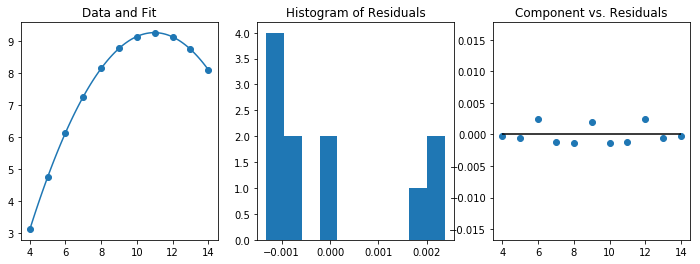

In [7]:
df2['xsq']=df2['x']**2
Y, X = dmatrices('y ~ x+xsq', data=df2)
lm2=sm.OLS(Y,X).fit()
print(lm2.summary())
#all plots:
fig, ax= plt.subplots(figsize=(12,4), ncols=3)
ax[0].scatter(df2['x'], df2['y'])

func=lambda x: lm2.params[0]+lm2.params[1]*x+lm2.params[2]*x**2
xgrd=np.linspace(np.min(df2['x']), np.max(df2['x']), 100)
ax[0].plot(xgrd, func(xgrd))

ax[0].set_title('Data and Fit')
ax[1].hist(lm2.resid)
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(df2['x'], lm2.resid)
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min(df2['x']), xmax=np.max(df2['x']))


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

Nonlinear means we should let $y$ *curve* as $x$ changes, so we also include $x^2$.  The result was that the error became almost zero everywhere: up to the rounding on the data, at least.  There's no assumptions about error necessary at this point!

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [25 points] Data Set 3

For the data set marked with "III" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

In [8]:
df3=df.loc[df['dataset']=='III']
Y, X = dmatrices('y ~ x', data=df3)
lm3=sm.OLS(Y,X).fit()
lm3.summary()

C:\Users\zacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 02 May 2021   Prob (F-statistic):            0.00218
Time:                        18:41:31   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026       0.459       5.546
x              0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

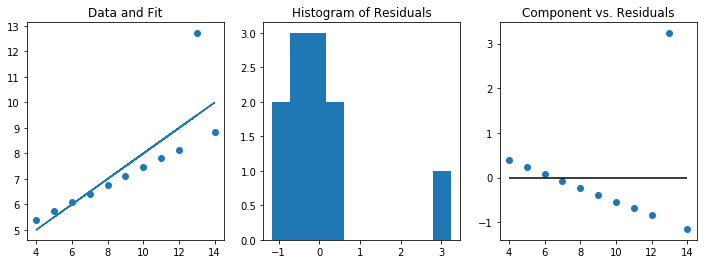

In [9]:
#all plots:
fig, ax= plt.subplots(figsize=(12,4), ncols=3)
ax[0].scatter(df3['x'], df3['y'])
ax[0].plot( df3['x'], lm3.fittedvalues)
ax[0].set_title('Data and Fit')
ax[1].hist(lm3.resid)
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(df3['x'], lm3.resid)
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min(df3['x']), xmax=np.max(df3['x']))


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

Our data looks like a perfect line... except that one big outlier!  This means we end up with a large right-skew on our residuals, and a pretty obvious pattern where we systematically overestimate nearly every larger $x$ values... except that big outlier.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

(array([2], dtype=int64),)


C:\Users\zacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


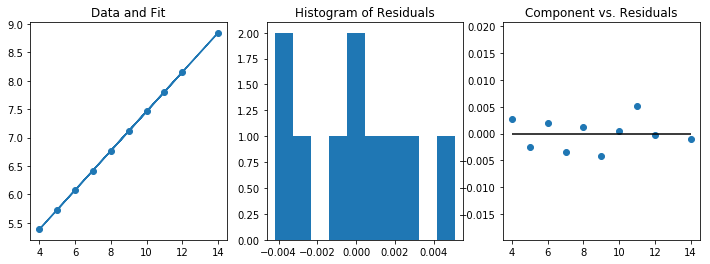

In [10]:
#let's remove the outlier!
df3=df.loc[df['dataset']=='III']

df3new=df3.drop(labels=24, axis=0)

Y, X = dmatrices('y ~ x', data=df3new)
lm3=sm.OLS(Y,X).fit()
lm3.summary()

#all plots:
fig, ax= plt.subplots(figsize=(12,4), ncols=3)
ax[0].scatter(df3new['x'], df3new['y'])
ax[0].plot( df3new['x'], lm3.fittedvalues)
ax[0].set_title('Data and Fit')
ax[1].hist(lm3.resid)
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(df3new['x'], lm3.resid)
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min(df3new['x']), xmax=np.max(df3new['x']))


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

We nailed it!  The error is now basically zero everywhere.  But what does this mean?

Removing a data point here means that our error isn't *actually* zero everywhere.  Rather, assuming that the error is a bunch of iid uniforms is incorrect.  Instead, there seems to be a small chance (in our data, 1/11) that a data point is "off" of the perfect line.  If it is, then the error might be quite large, but we didn't have enough points off the line to estimate it.  Our best description of the process is "perfectly linear... most of the time."

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
## [25 points] Data Set 4

For the data set marked with "IV" in the given data frame, perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

In [11]:
df4=df.loc[df['dataset']=='IV']
Y, X = dmatrices('y ~ x', data=df4)
lm4=sm.OLS(Y,X).fit()
lm4.summary()

C:\Users\zacha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Sun, 02 May 2021   Prob (F-statistic):            0.00216
Time:                        18:41:32   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.026       0.459       5.544
x              0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

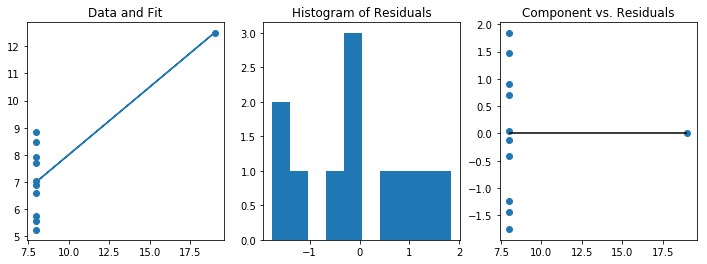

In [12]:
#all plots:
fig, ax= plt.subplots(figsize=(12,4), ncols=3)
ax[0].scatter(df4['x'], df4['y'])
ax[0].plot( df4['x'], lm4.fittedvalues)
ax[0].set_title('Data and Fit')
ax[1].hist(lm4.resid)
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(df4['x'], lm4.resid)
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min(df4['x']), xmax=np.max(df4['x']))


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

This is... pretty awkward.  We have a very good understanding of the error at $x=8$, but whoever made this data set only gave us one $x$ value that WASN'T at $x=8$. So we think things look like y increases as $x$ does, but we won't get good conclusions about homoskedasticity or the structure of residuals.  At least things might be close to normal at $x=8$.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

Nothing to do here: it *does* look like we should say that the point at $x=20$ is "higher" than the points at $x=8$, and our line does that.  We just don't actually get good measures for uncertainty here.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

Removing data is generally pretty scary, and weakens our conclusions.  What we really want is a better spread of our our $x$ data: so we should go gather more data to understand if our line is a real thing!